# King County House Data Analysis

- Student name: Gamze Turan
- Student pace: self paced
- Scheduled project review date/time: 
- Instructor name: Claude Fried
- Blog post URL:

<img align="center" width="600" height="300" src='images/kc_homes.jpg'>

## Overview

> The XYZ Construction Company in King County would like to invest on the old houses to possibly built a brand new complex living or building to increace more living space for the community as well as expand companies profit value. The key of the project is finding minimum price houses with maximum square feet lot in order to built either complex living or building. I will determine the King County House Sales data to determine minimum price houses (for purchase) in maximum square feet lot (for maximum living space) with Linear Regression models. 

## Business Understanding

<img align="center" width="600" height="100" src='images/buyerseller.jpg'>

 XYZ Construction company looking for a minimum price maximum sqare feet lot houses to built brand new complex living or buildings.

## Data Understanding

The King County Sales Data covers all aspect of the purchasing houses. Price, square feet living, square feet lot etc. In the data I will start with Linear Regression basic model, evaluate it, and then I will provide justification for and proceed to a new model. Based on the results, I will discuss two features that have strong relationships with housing prices.Is it older the house lower the price? Further the location lower the price?

In [212]:
# importing necessary library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from matplotlib import style

plt.style.use('seaborn')
style.use('ggplot')
import folium
%matplotlib inline

In [213]:
kc_df = pd.read_csv('data/kc_house_data.csv')
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [214]:
kc_df.shape

(21597, 21)

In [215]:
kc_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [216]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Data cleaning

The best way to start an analyzing is cleaning the data. I went through all the columns and datatypes I 

In [217]:
#inspect each column
for val in kc_df:
    print(kc_df[val].value_counts())
    print()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/30/2014      1
5/27/2015      1
5/15/2015      1
8/3/2014       1
1/31/2015      1
Name: date, Length: 372, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      7

In [218]:
#drop the date column
kc_df = kc_df.drop(['date'], axis=1)

In [219]:
# drop the id column
kc_df = kc_df.drop(['id'], axis=1)

In [220]:
kc_df.sqft_basement.unique() # checking the unique value in the column

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [221]:
# dropping row with '?' 
kc_df = kc_df[kc_df.sqft_basement != '?']

In [222]:
#converting sqft_basement column str to float
kc_df['sqft_basement'] = kc_df['sqft_basement'].astype("float")

In [223]:
# encoding zipcode to str
kc_df['zipcode'] = kc_df['zipcode'].astype('str')

In [224]:
# to check the datatypes
kc_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Exploring Null  (NaN) Values

In [225]:
# checking if is there any Null values in the dataset
kc_df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [226]:
# summary statistics of view column
kc_df.view.describe()

count    21082.000000
mean         0.233327
std          0.765066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [227]:
#since the median value is "zero". I decide to replace Null values with median value
kc_df.view = kc_df.view.fillna(value=kc_df.view.median())

In [228]:
# to check how many houses are waterfront
kc_df.waterfront.value_counts()

0.0    18662
1.0      142
Name: waterfront, dtype: int64

In [229]:
# there are 142 houses waterfront.So, I replace the Null value with median
kc_df.waterfront = kc_df.waterfront.fillna(value=kc_df.waterfront.median())

In [230]:
kc_df.yr_renovated.describe()

count    17389.000000
mean        82.991949
std        398.481819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [231]:
# median value of the column yr_renovated is also zero.So we can replace the Null value in median value
kc_df.yr_renovated = kc_df.yr_renovated.fillna(value=kc_df.yr_renovated.median())

In [232]:
# Lets check our data null values again
kc_df.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Basic Linear Model

> Below test shows that sqft_living(independent variable) has high correlation with price(dependent variable). In Basic linear model high R-squared value (0.84) and low P-value(0) shows there is a relationship between variables. Q-Q data plot is not normally distributed and scatter plots are very homoscedastic.

#### To Check Highest Correlation with target variable to build Basic Linear Model

In [233]:
kc_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.265969,0.394885,0.035290,0.667738,0.605143,0.325008,0.054459,0.116719,0.306507,0.022101,0.586415,0.083192
bedrooms,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.080208,0.025710,0.356882,0.479210,0.302683,0.157017,0.018452,-0.009521,0.131093,0.392476,0.030479
bathrooms,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,0.186795,-0.128015,0.666493,0.686456,0.282693,0.508408,0.047955,0.024994,0.224479,0.570129,0.088834
sqft_living,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,0.282950,-0.061294,0.763101,0.876678,0.434576,0.319461,0.049964,0.052986,0.240797,0.756389,0.184466
sqft_lot,0.087937,0.032262,0.087884,0.172941,1.000000,-0.007522,0.021211,0.072420,-0.009671,0.113402,0.183461,0.015533,0.052768,0.004182,-0.085457,0.230583,0.143428,0.720649
floors,0.256355,0.179044,0.504071,0.354688,-0.007522,1.000000,0.020307,0.027727,-0.264280,0.459214,0.524225,-0.245144,0.489665,0.003526,0.048977,0.125922,0.280294,-0.011545
waterfront,0.265969,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.378926,0.016728,0.083602,0.072201,0.084949,-0.023843,0.070231,-0.011567,-0.036371,0.085174,0.030250
view,0.394885,0.080208,0.186795,0.282950,0.072420,0.027727,0.378926,1.000000,0.045355,0.249354,0.166610,0.275440,-0.054330,0.088347,0.006375,-0.076119,0.280282,0.072555
condition,0.035290,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,0.016728,0.045355,1.000000,-0.148508,-0.159289,0.170972,-0.362107,-0.056205,-0.015592,-0.106285,-0.093493,-0.004860
grade,0.667738,0.356882,0.666493,0.763101,0.113402,0.459214,0.083602,0.249354,-0.148508,1.000000,0.756382,0.168023,0.448120,0.015882,0.113380,0.199187,0.713574,0.121921


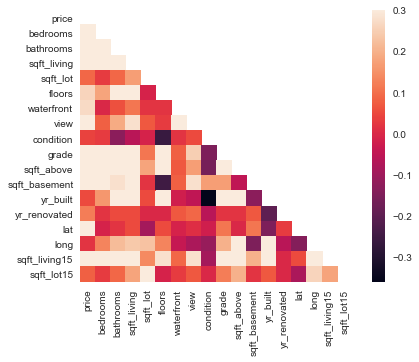

In [234]:
corrprice = kc_df.corr().round(2)
mask = np.zeros_like(corrprice)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corrprice, mask=mask, vmax=.3, square=True)

In [235]:
#basic linear model
X =kc_df['sqft_living']
y = kc_df['price']
basemodel = sm.OLS(y, X).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.099e+05
Date:                Thu, 26 May 2022   Prob (F-statistic):                        0.00
Time:                        20:10:06   Log-Likelihood:                     -2.9383e+05
No. Observations:               21143   AIC:                                  5.877e+05
Df Residuals:                   21142   BIC:                                  5.877e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.2823      0.794    331.543      0.000     261.726     264.839
==============================================================================
Omnibus:                    15743.676   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           684298.792
Skew:                           3.143   Prob(JB):                         0.00
Kurtosis:                      30.153   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

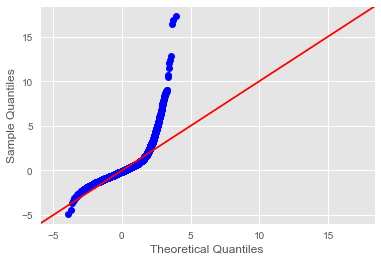

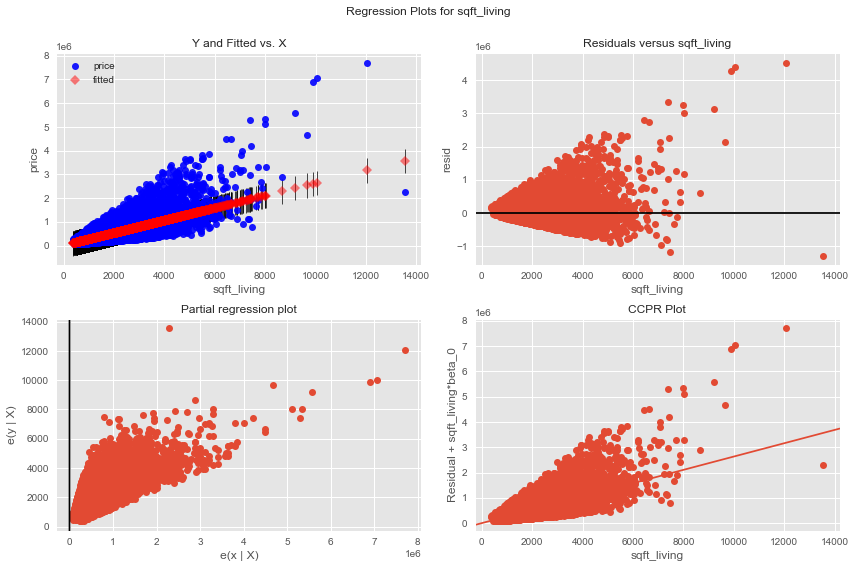

In [236]:
# Q-Q plot and 
sm.graphics.qqplot(basemodel.resid, line='45',fit=True);
sm.graphics.plot_regress_exog(basemodel, 'sqft_living', fig=plt.figure(figsize=(12,8)));

### Multicolinearity

In [237]:
pd.options.display.max_columns = 999

numeric_vars = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
                'sqft_lot15']

In [238]:
kc_df_preprocessed= kc_df.loc[:, numeric_vars]
kc_df_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


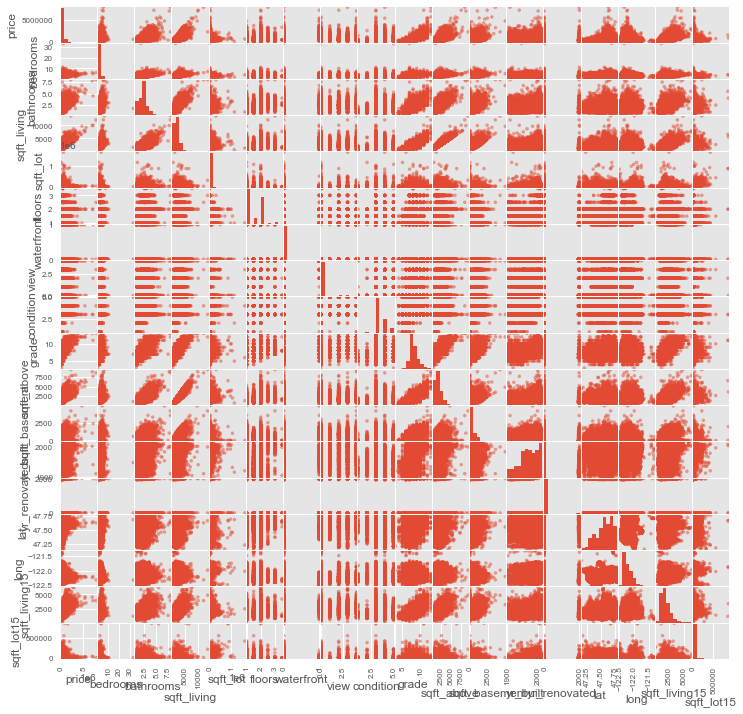

In [239]:
pd.plotting.scatter_matrix(kc_df_preprocessed, figsize=[12, 12]);

In [240]:
kc_df_preprocessed.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.265969,0.394885,0.035290,0.667738,0.605143,0.325008,0.054459,0.116719,0.306507,0.022101,0.586415,0.083192
bedrooms,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.080208,0.025710,0.356882,0.479210,0.302683,0.157017,0.018452,-0.009521,0.131093,0.392476,0.030479
bathrooms,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,0.186795,-0.128015,0.666493,0.686456,0.282693,0.508408,0.047955,0.024994,0.224479,0.570129,0.088834
sqft_living,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,0.282950,-0.061294,0.763101,0.876678,0.434576,0.319461,0.049964,0.052986,0.240797,0.756389,0.184466
sqft_lot,0.087937,0.032262,0.087884,0.172941,1.000000,-0.007522,0.021211,0.072420,-0.009671,0.113402,0.183461,0.015533,0.052768,0.004182,-0.085457,0.230583,0.143428,0.720649
floors,0.256355,0.179044,0.504071,0.354688,-0.007522,1.000000,0.020307,0.027727,-0.264280,0.459214,0.524225,-0.245144,0.489665,0.003526,0.048977,0.125922,0.280294,-0.011545
waterfront,0.265969,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.378926,0.016728,0.083602,0.072201,0.084949,-0.023843,0.070231,-0.011567,-0.036371,0.085174,0.030250
view,0.394885,0.080208,0.186795,0.282950,0.072420,0.027727,0.378926,1.000000,0.045355,0.249354,0.166610,0.275440,-0.054330,0.088347,0.006375,-0.076119,0.280282,0.072555
condition,0.035290,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,0.016728,0.045355,1.000000,-0.148508,-0.159289,0.170972,-0.362107,-0.056205,-0.015592,-0.106285,-0.093493,-0.004860
grade,0.667738,0.356882,0.666493,0.763101,0.113402,0.459214,0.083602,0.249354,-0.148508,1.000000,0.756382,0.168023,0.448120,0.015882,0.113380,0.199187,0.713574,0.121921


In [241]:
abs(kc_df_preprocessed.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [242]:
kc_df = kc_df_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

kc_df['pairs'] = list(zip(kc_df.level_0, kc_df.level_1))

kc_df.set_index(['pairs'], inplace = True)

kc_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
kc_df.columns = ['cc']

kc_df.drop_duplicates(inplace=True)

kc_df[(kc_df.cc>.75) & (kc_df.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876678
"(sqft_living, grade)",0.763101
"(sqft_living, sqft_living15)",0.756389
"(grade, sqft_above)",0.756382
"(bathrooms, sqft_living)",0.755278


>There are five sets of variables that are highly correlated

In [243]:
#kc_df_preprocessed.drop(columns=['sqft_above', 'sqft_living', 'grade'], inplace=True)

### Feature Scaling & Normalization

### Preprocessing 

In [159]:
# The prediction target is price of the home
y =kc_df['price']
X = kc_df.drop('price', axis=1)

In [160]:
#train set and a test set prior to performing any preprocessing steps
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [161]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 15857 rows and 18 columns
y_train is a Series with 15857 values


In [162]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [163]:
# checking models performance
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=3)

array([0.70049821, 0.68529264, 0.70925553])

> between 69% and 71% of the variance in the target with our current set.

### Preprocess Test Data

In [165]:
X_test.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [54]:
# visualize the results
#yhat =model.predict(X)
#plt.scatter(X, y)
#sns.lineplot(x=x, y=yhat, color='red')

In [55]:
#resid = yhat - y

In [56]:
#sns.histplot(x=resid, kde=True);

### Evaluate

In [57]:
#import statsmodels.api as sm
#import scipy.stats as stats

In [58]:
# normality or residuals
#fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [59]:
#homoscedasic
#plt.scatter(yhat, resid)
#plt.hlines(y=0, xmin=yhat.min(), xmax=yhat.max())

In [60]:
#model.score(X, y)
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

In [166]:
kc_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [62]:
# load kc_house_data.csv as pandas DataFrame
plt.style.use('seaborn')




data = kc_df.loc[:, subset]

> The columns in the King County House Sales data represent the dependent and independent variables. We have taken a subset of all columns available to focus on feature interpretation rather than preprocessing steps. The dependent variable here is house Price.

In [63]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


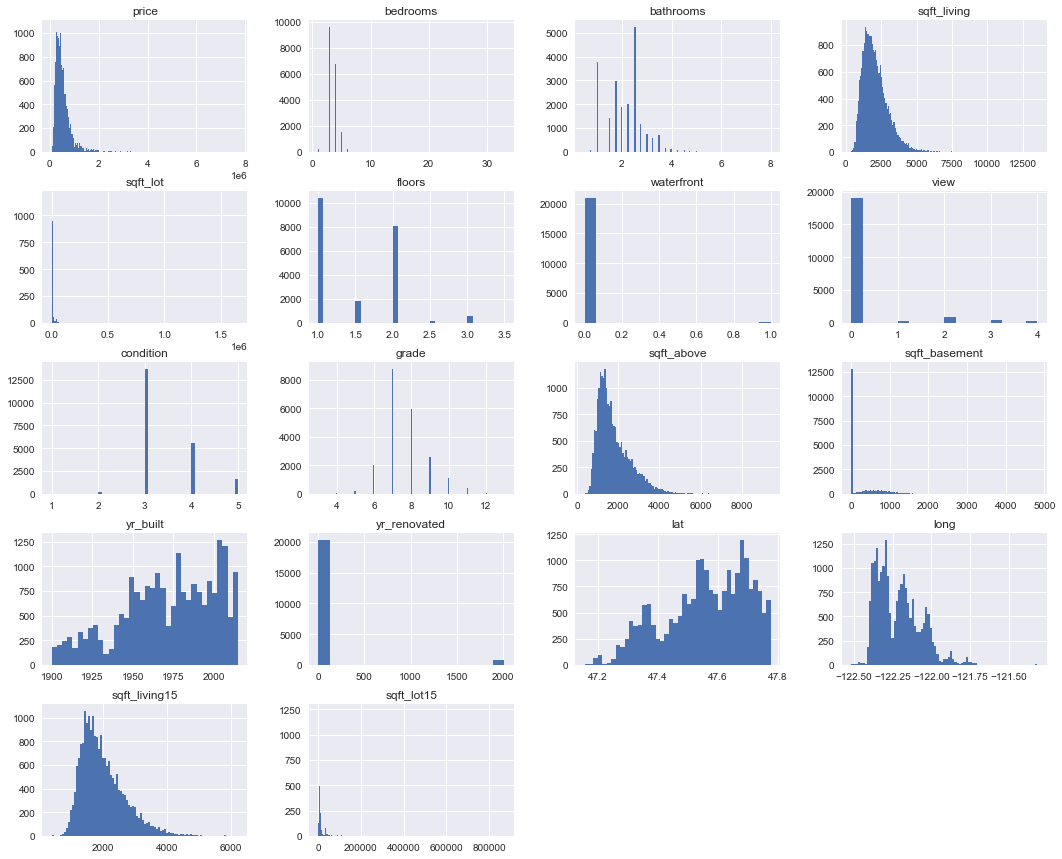

In [64]:
# Create histogram for all variables in the dataset
data.hist(figsize=(18,15), bins='auto');

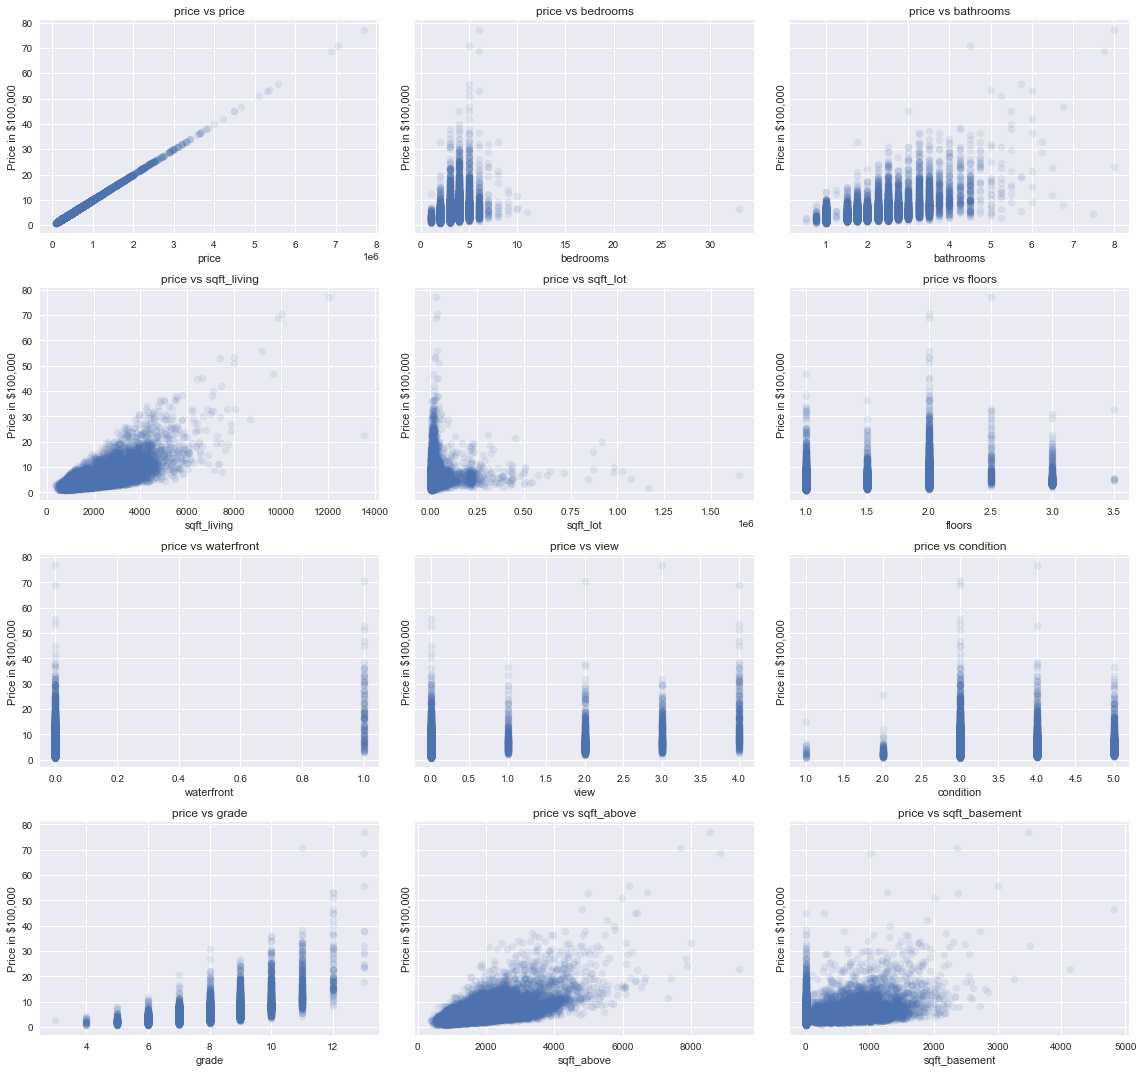

In [65]:
# Check the linearity assumption for all chosen features with target variable using scatter plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')
    
fig.tight_layout()

### Simple Regression

King County House Sale DataSet - Regression Analysis and Diagnostics for Price~price
----------------------------------------------------------------------------------------


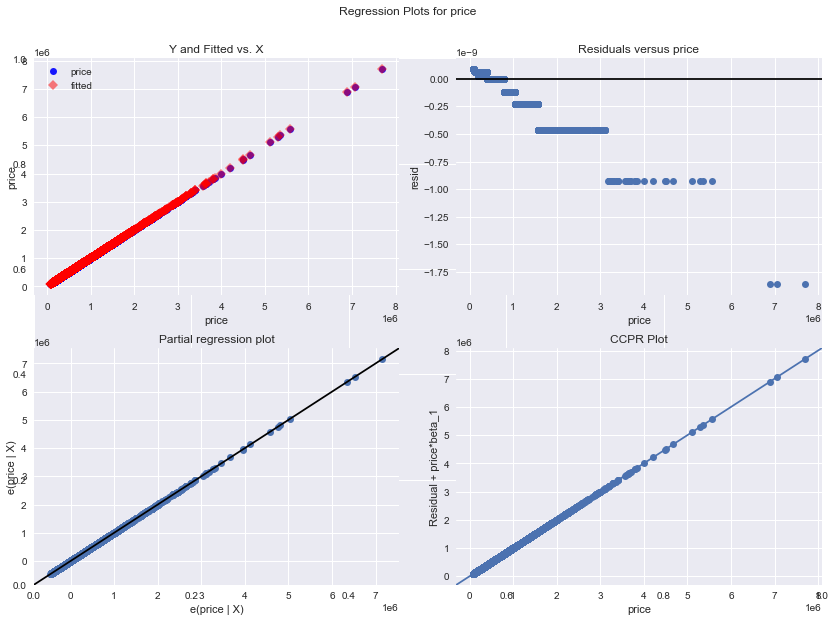

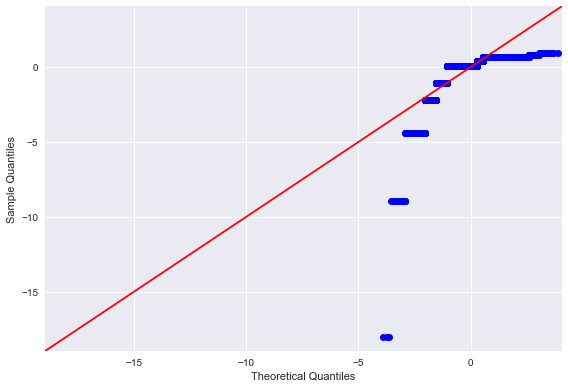

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~bedrooms
----------------------------------------------------------------------------------------


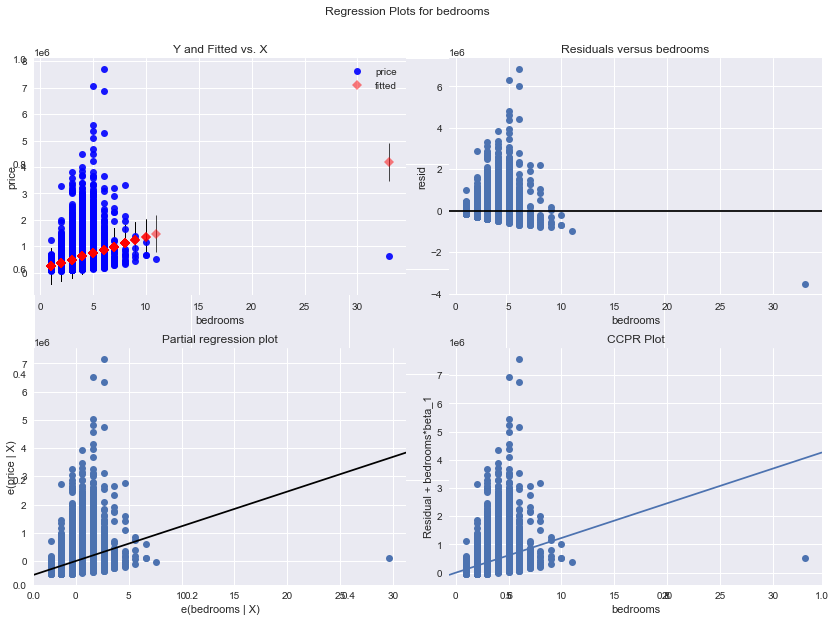

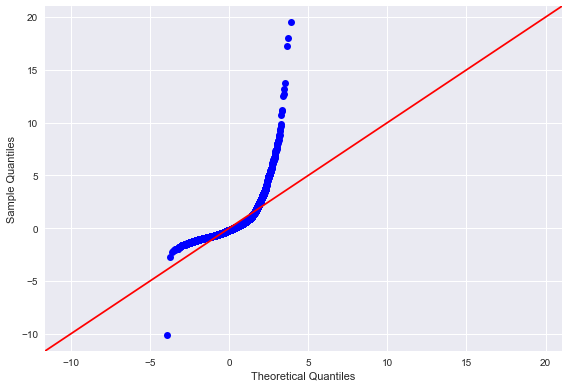

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~bathrooms
----------------------------------------------------------------------------------------


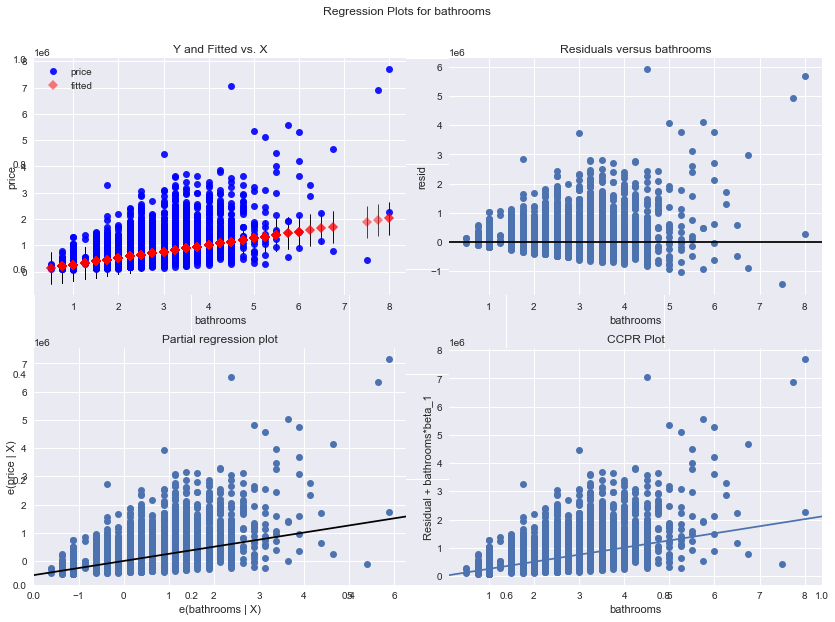

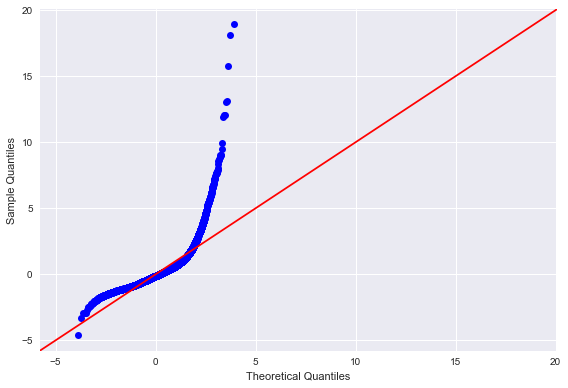

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~sqft_living
----------------------------------------------------------------------------------------


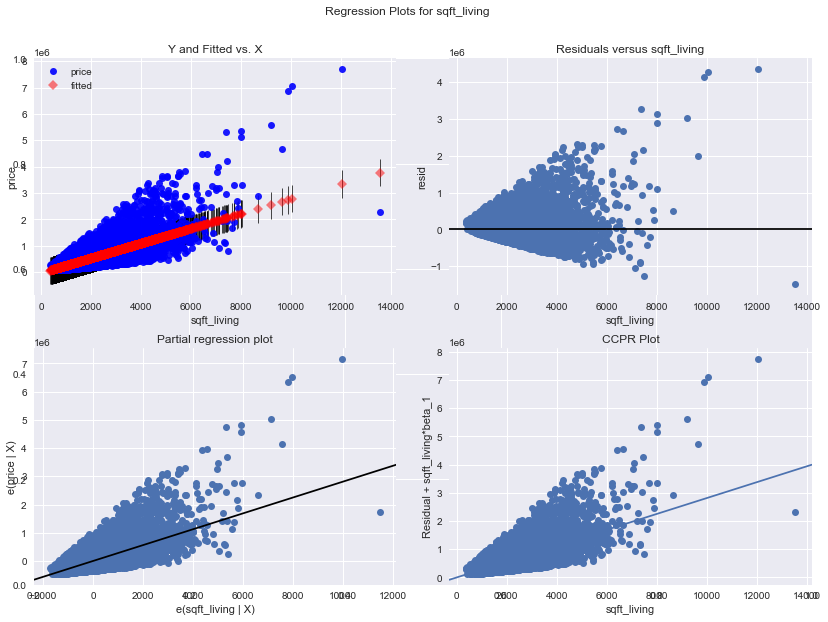

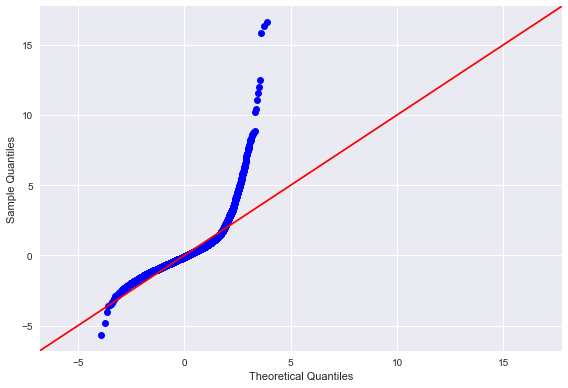

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~sqft_lot
----------------------------------------------------------------------------------------


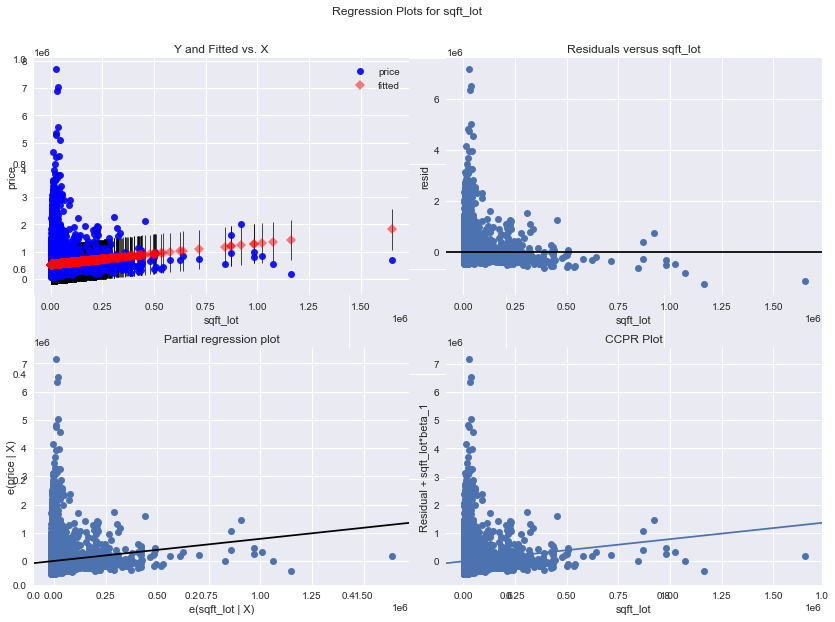

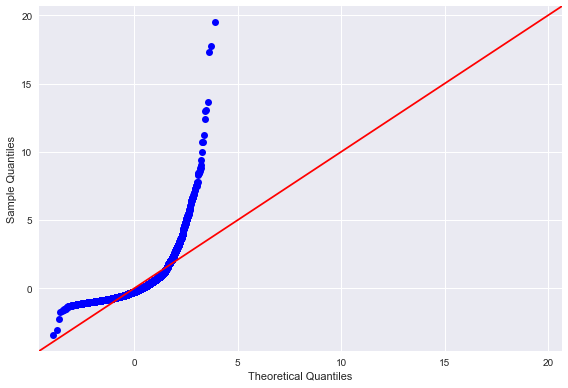

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~floors
----------------------------------------------------------------------------------------


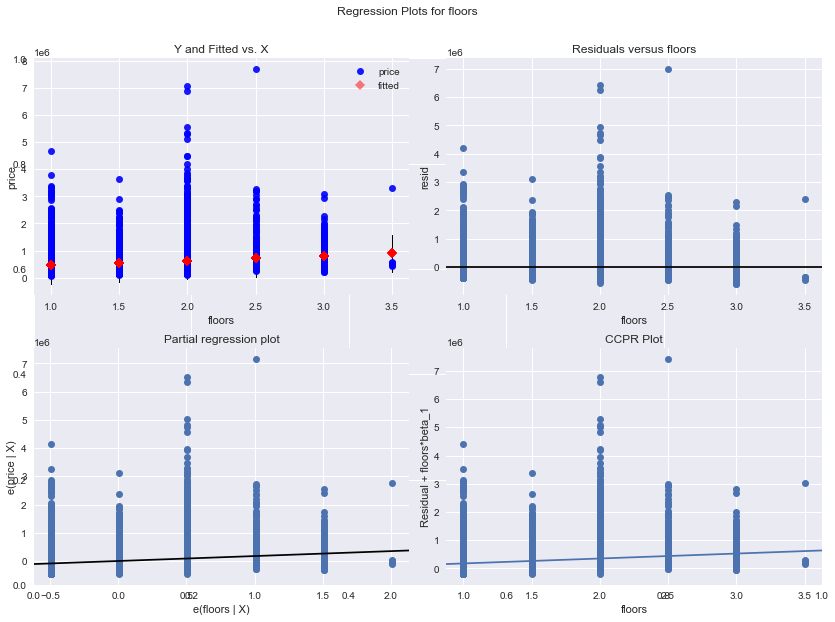

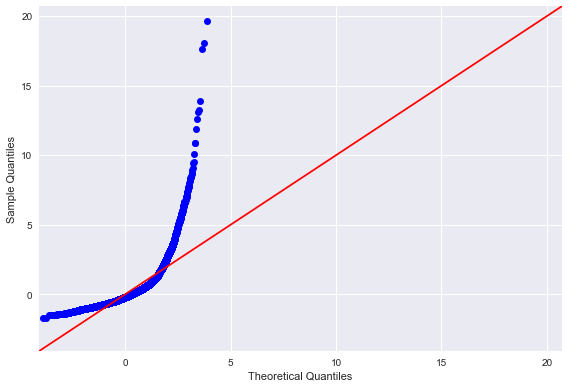

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~waterfront
----------------------------------------------------------------------------------------


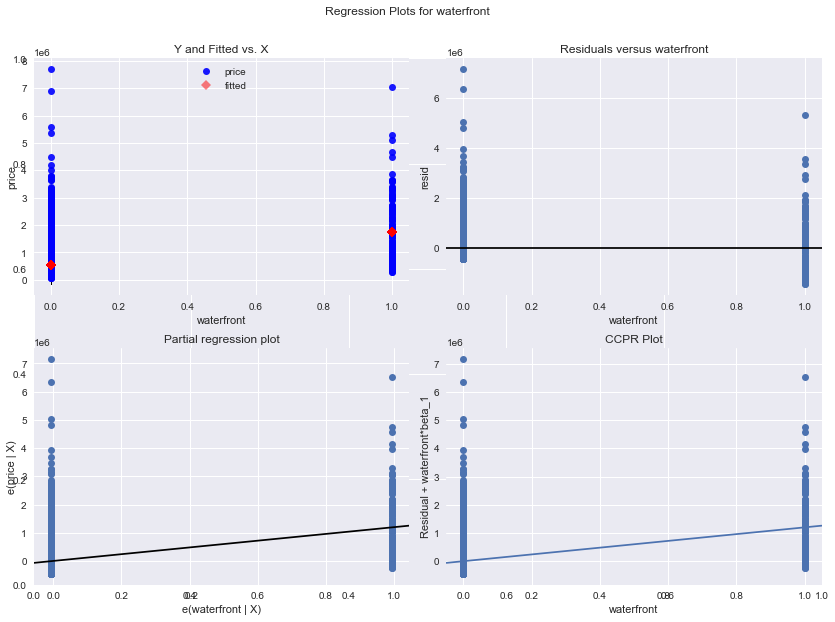

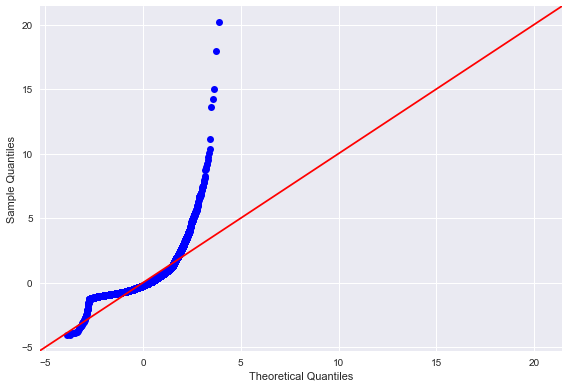

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~view
----------------------------------------------------------------------------------------


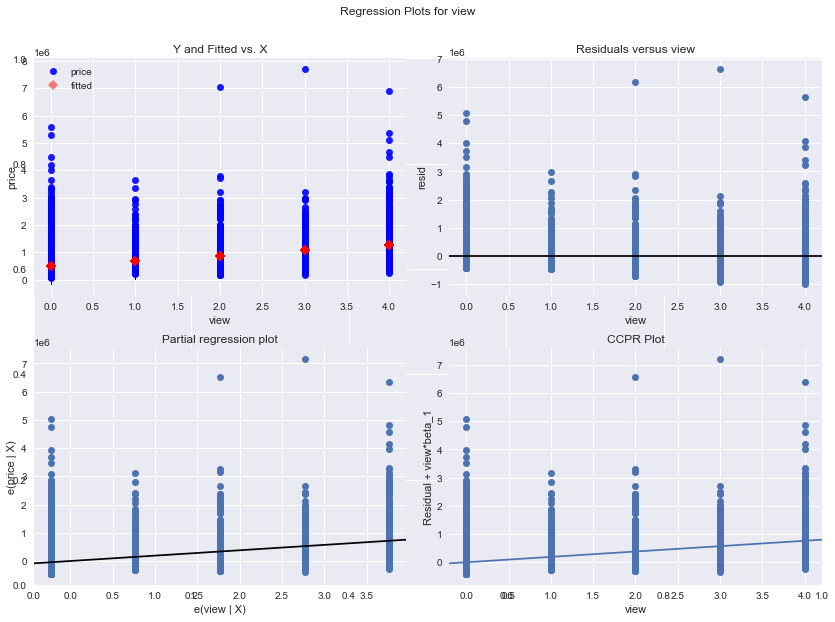

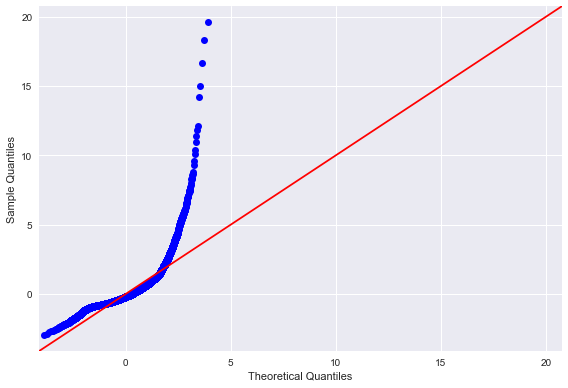

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~condition
----------------------------------------------------------------------------------------


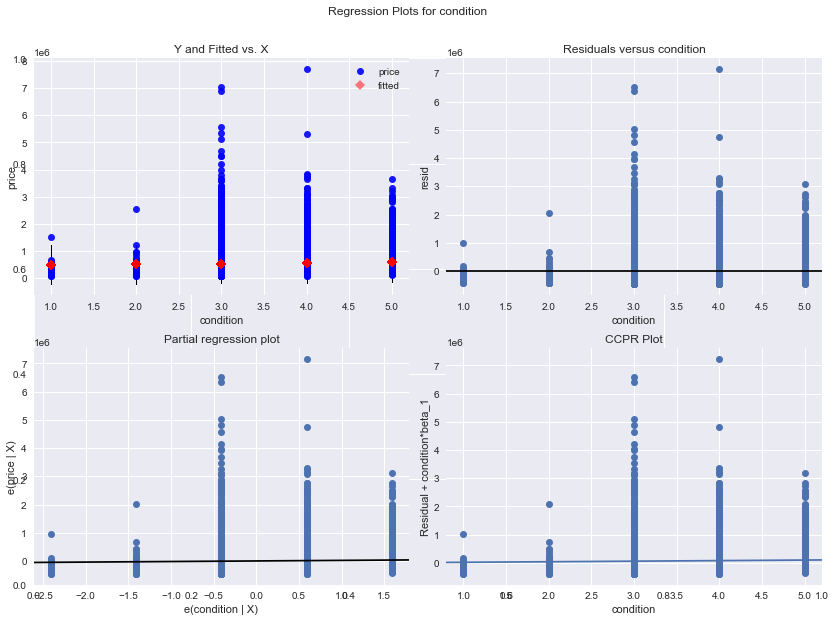

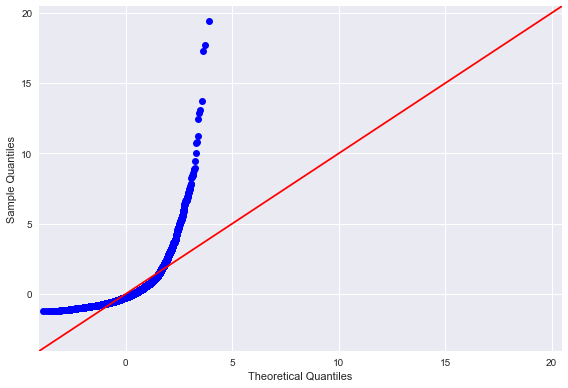

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~grade
----------------------------------------------------------------------------------------


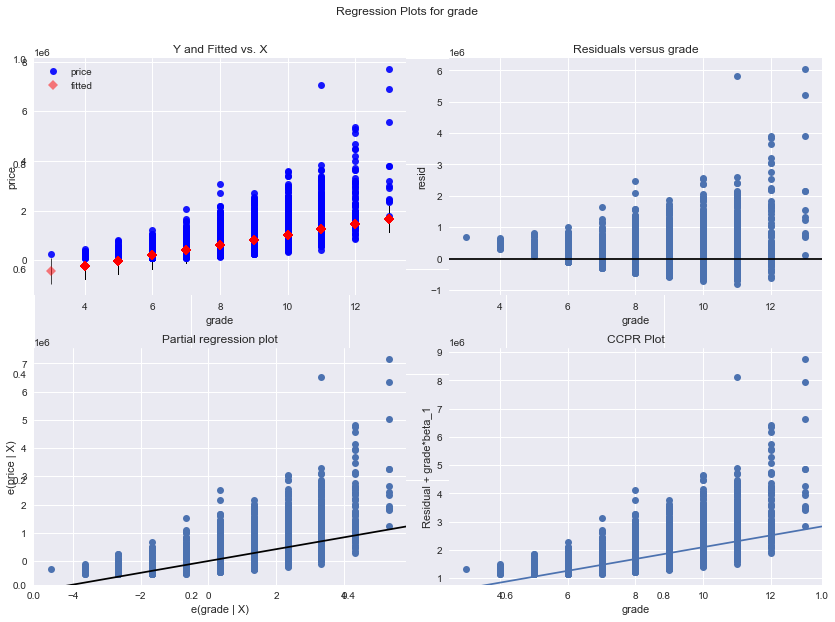

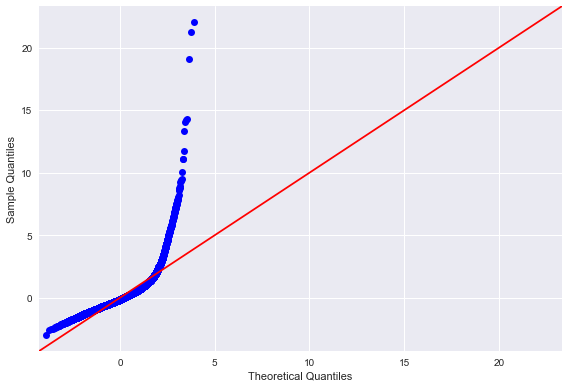

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~sqft_above
----------------------------------------------------------------------------------------


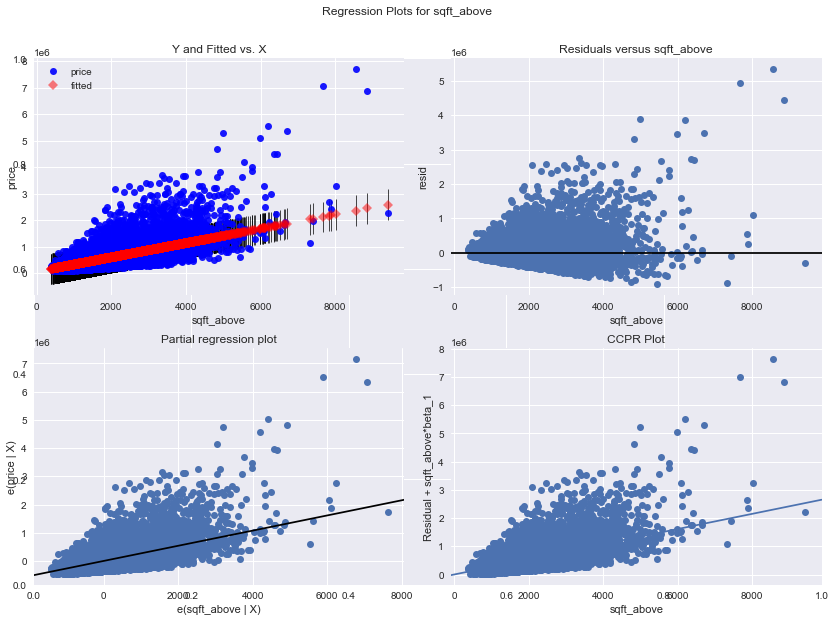

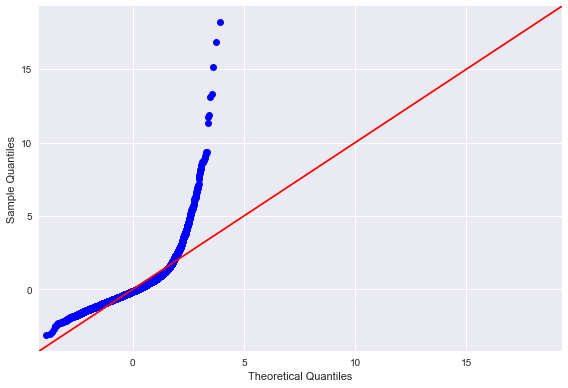

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~sqft_basement
----------------------------------------------------------------------------------------


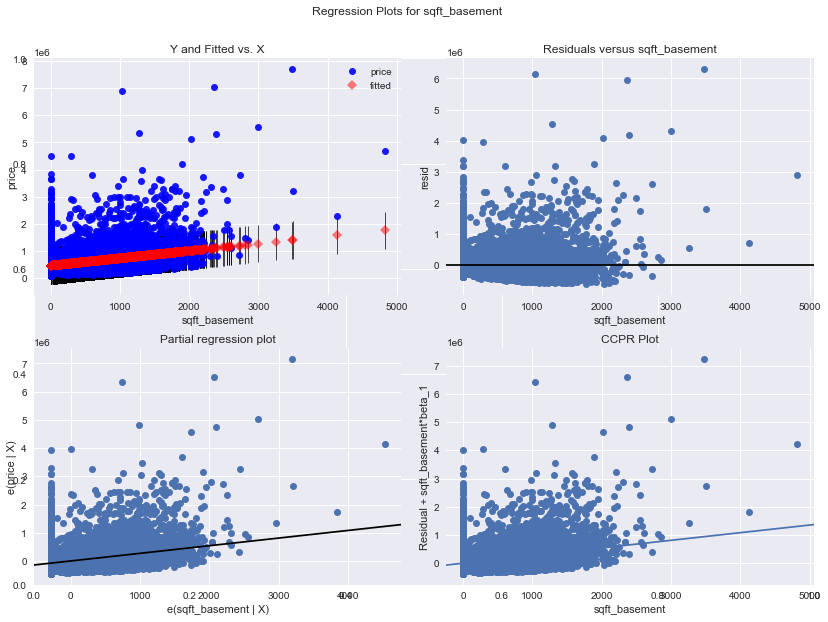

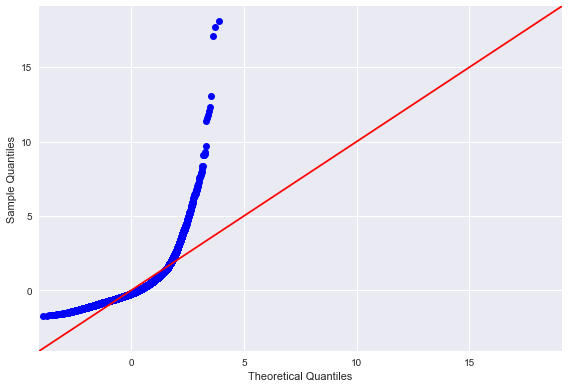

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~yr_built
----------------------------------------------------------------------------------------


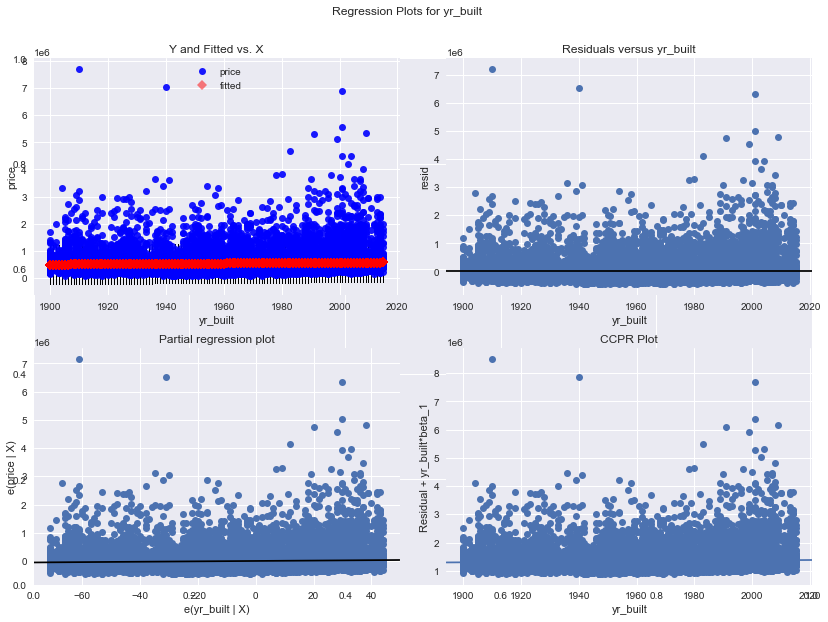

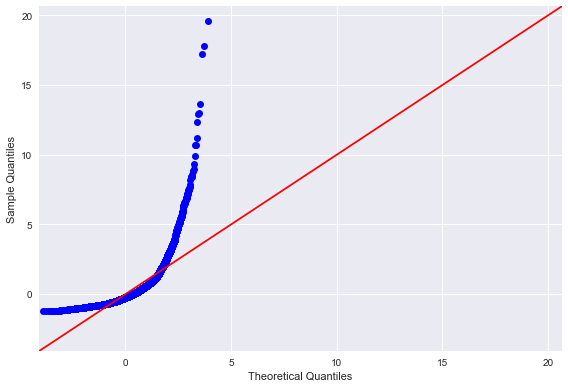

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~yr_renovated
----------------------------------------------------------------------------------------


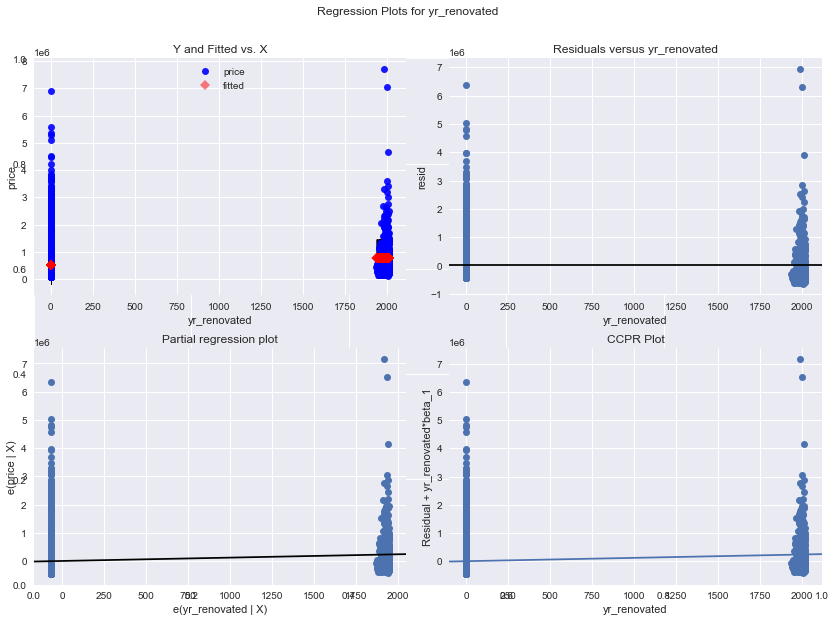

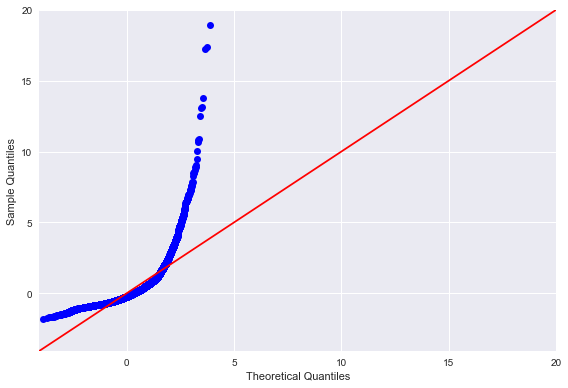

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~lat
----------------------------------------------------------------------------------------


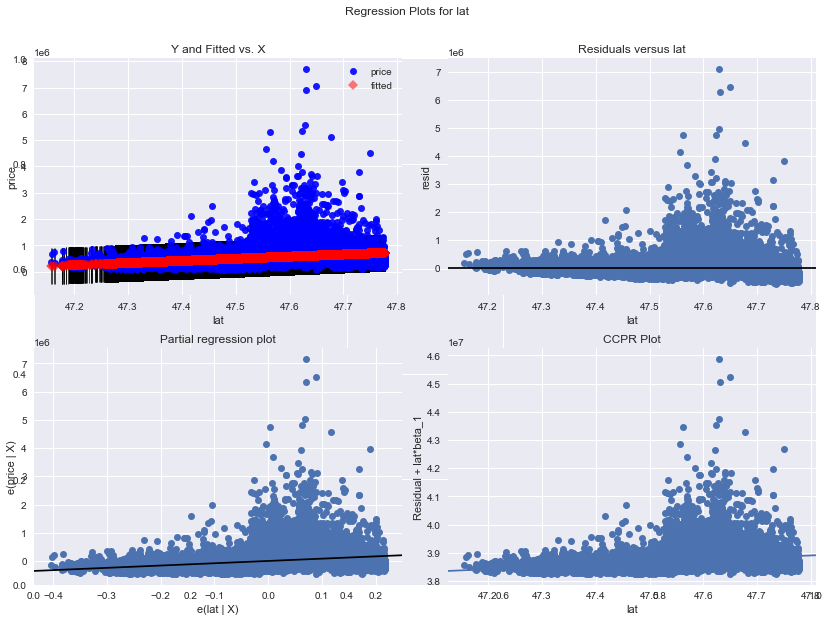

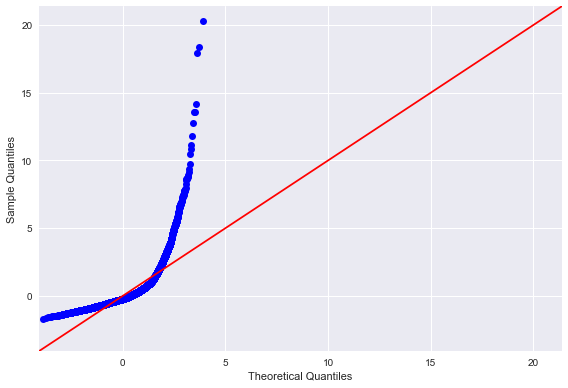

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~long
----------------------------------------------------------------------------------------


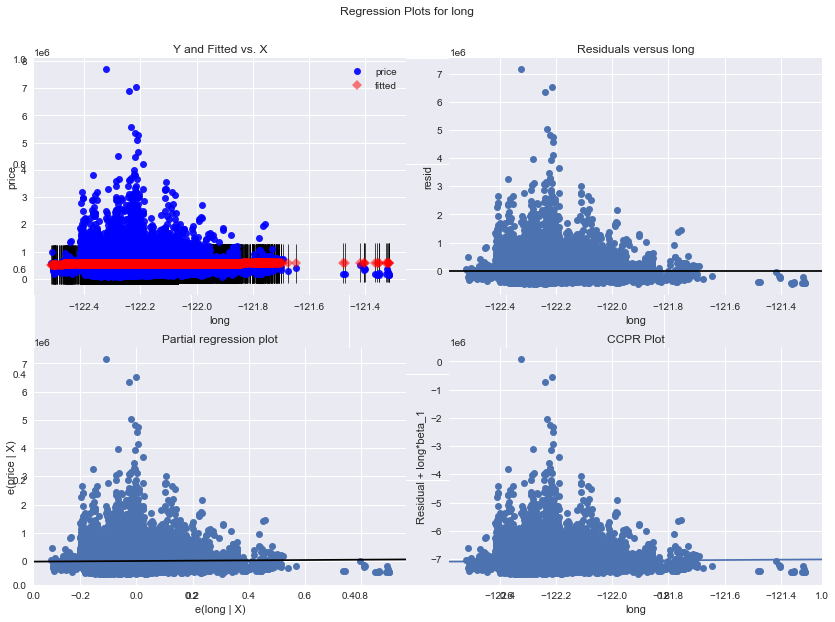

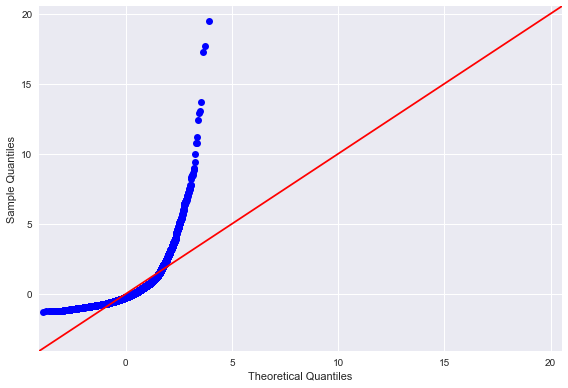

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~sqft_living15
----------------------------------------------------------------------------------------


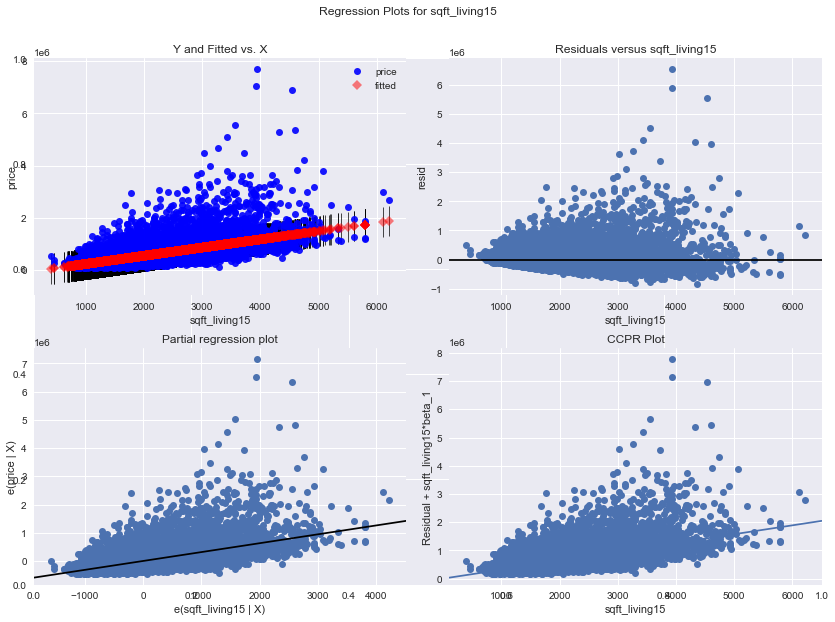

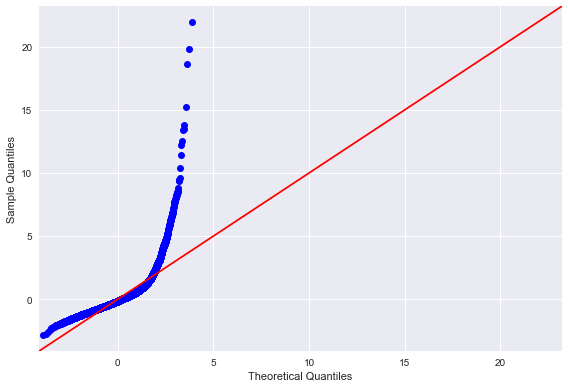

Press Enter to continue...
King County House Sale DataSet - Regression Analysis and Diagnostics for Price~sqft_lot15
----------------------------------------------------------------------------------------


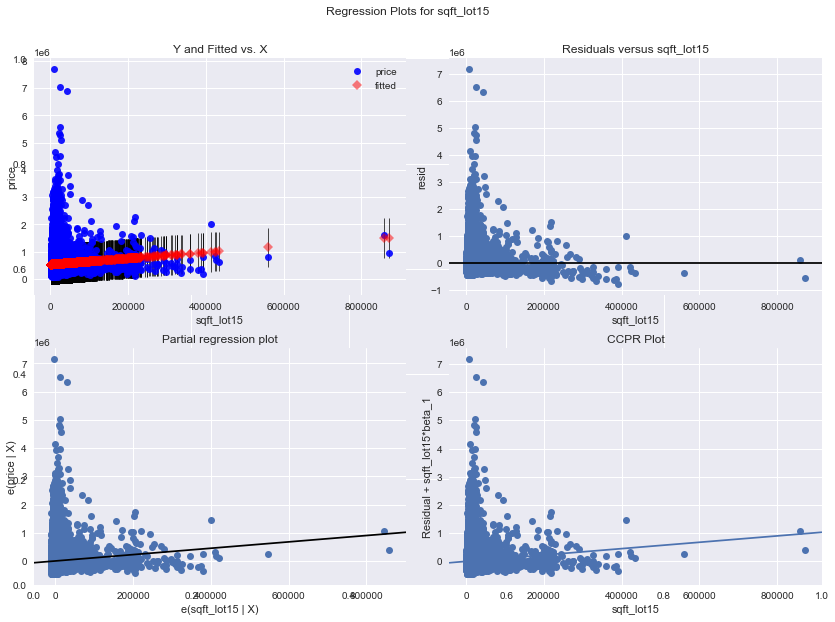

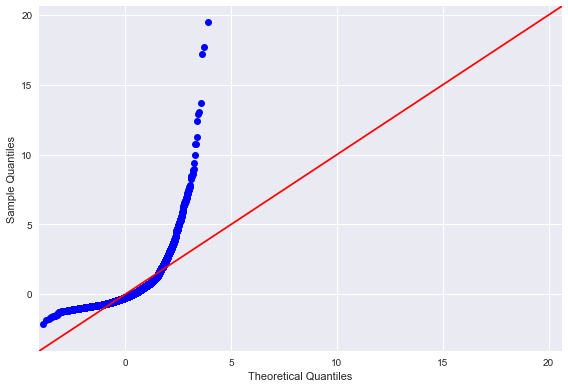

Press Enter to continue...


In [66]:
# OLS regression between independent and dependent variables
# residual plot
# Q-Q plot for regression residuals normality test
results = []
for idx, column in enumerate(data.columns):
    print(f"King County House Sale DataSet - Regression Analysis and Diagnostics for Price~{column}")
    print("----------------------------------------------------------------------------------------")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=data).fit()
    
    fig, axes = plt.subplots(figsize=(12,9))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")

In [67]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])

,ind_var,r_squared,intercept,slope,p-value,normality (JB)
0,price,1.000000,-9.596590e-11,1.000000e+00,0.000000e+00,9.088168e+05
1,bedrooms,0.095607,1.255204e+05,1.230491e+05,0.000000e+00,1.184658e+06
2,bathrooms,0.276559,7.543027e+03,2.518657e+05,0.000000e+00,8.736383e+05
3,sqft_living,0.493264,-4.512840e+04,2.814327e+02,0.000000e+00,5.358342e+05
4,sqft_lot,0.007733,5.286607e+05,7.854379e-01,1.430183e-37,1.135762e+06
5,floors,0.065718,2.791625e+05,1.749797e+05,0.000000e+00,1.242826e+06
6,waterfront,0.070739,5.324610e+05,1.198559e+06,0.000000e+00,8.976899e+05
7,view,0.155934,4.962532e+05,1.902291e+05,0.000000e+00,1.062606e+06
8,condition,0.001245,4.724203e+05,1.996832e+04,2.856421e-07,1.125829e+06
9,grade,0.445874,-1.062410e+06,2.093056e+05,0.000000e+00,2.027476e+06
